In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc

# from chiral import CHIRAL
# from helper_fn import optimal_shift

from pyCHIRAL import CHIRAL, optimal_shift, ccg

In [9]:
path = "/Users/salati/Documents/CODE/github/scCircadianMeta/data/BULK/zhang.h5ad"
adata = sc.read_h5ad(path)

organ = "liver"

/Users/salati/miniforge3/envs/numpyro/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [10]:
# log - transform the data
cc = np.median(adata.X.sum(axis=1))
eps = 1/cc
adata.layers["s_log"] = np.log(adata.layers["s_norm"] + eps)

adata2 = adata[adata.obs.organ == organ]

In [11]:
ccg

array(['Arntl', 'Npas2', 'Cry1', 'Cry2', 'Per1', 'Per2', 'Nr1d1', 'Nr1d2',
       'Tef', 'Dbp', 'Ciart', 'Per3', 'Bmal1'], dtype='<U5')

In [12]:
res = CHIRAL(E=adata2, clockgenes=ccg ,layer="s_log", iterations=500)

/Users/salati/miniforge3/envs/numpyro/lib/python3.12/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Finding an initial guess for phases...: 100%|██████████| 1000/1000 [00:00<00:00, 20682.48it/s]
  0%/Users/salati/Documents/CODE/github/scCircadianMeta/rhythm_module/pyCHIRAL/pyCHIRAL/em.py:228: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Q_hist = pd.concat([Q_hist, Q_temp])  # Append the new iteration results
  2%

Algorithm has converged


In [13]:
w =  2 * np.pi / 24
true_phase = (adata2.obs.ZT.values % 24) * w
phi = res["phi"]

phase_aligned, mad = optimal_shift(phi, true_phase)
mad

0.23105735860382637

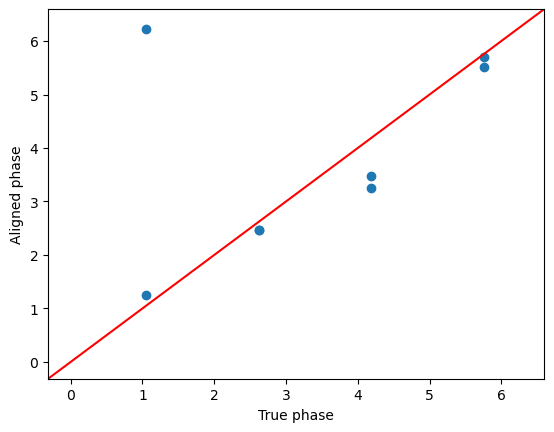

In [15]:
plt.scatter(true_phase, phase_aligned)
plt.xlabel("True phase")
plt.ylabel("Aligned phase")
plt.axline([0, 0], [2*np.pi, 2*np.pi], color="red")